In [516]:
# Importing Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import plotly.plotly as py
import plotly.figure_factory as ff
import math
from scipy.stats import norm

In [26]:
# Importing data
df = pd.DataFrame.from_csv('rawdata/data_revised_2.csv', header=0, sep=',', index_col=0)
df.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls



,age,gender,salary,retirement_age,marital_status,state_of_residence,health_risk_score,salary_growth_rate,salary_risk_score,pensions,...,recommended_account11_name,recommended_account11_pre_tax_contrib,recommended_account11_roth_contrib,recommended_account11_post_tax_contrib,recommended_account11_taxable_contrib,recommended_account12_name,recommended_account12_pre_tax_contrib,recommended_account12_roth_contrib,recommended_account12_post_tax_contrib,recommended_account12_taxable_contrib
name,,,,,,,,,,,,,,,,,,,,,
637,60,M,50000,64,True,IL,0.4,0.005,-1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,59,M,235000,66,True,VA,0.8,0.020,-0.5,95000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,61,M,120000,65,False,PA,0.4,0.015,-0.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
663,65,M,300000,65,False,CO,0.4,0.010,-0.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,69,F,96000,67,True,MO,0.0,0.010,-1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


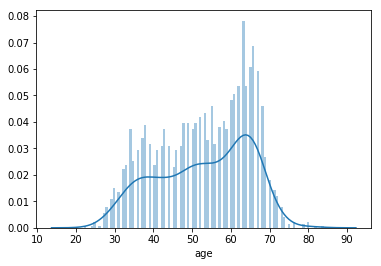

In [571]:
#Visualization 1: Unconditional Distribution of investor ages
sns.distplot(df.age, bins=100)

## TODO: distribution in tabular format

## can you specify the size of the bins? e.g. 5 year bins

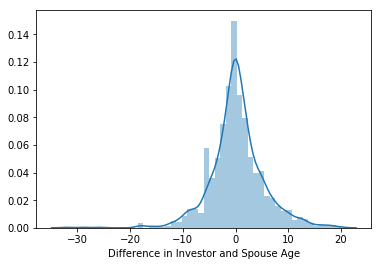

In [574]:
#Visualization 2: Distribution of age difference for married investors
ageMarriedInvestor = df.age[df.marital_status == True]
spouseAgeMarriedInvestor = df.spouse_age[df.marital_status == True]
diff = spouseAgeMarriedInvestor - ageMarriedInvestor

#outliers
#diff[diff>20]

#plot
sns.distplot(diff, axlabel='Difference in Investor and Spouse Age')

## percentile of distribution? 

## average distribution per bin (-30 to -20, -20 to -10,...)

## goal - minimize the number of bins per dimension 

## overlay quantiles on top of this chart

In [31]:
#Visualization 3: Count of single vs. married investors
countMarried = sum(df.marital_status==True)
countMarried

countSingle = sum(df.marital_status==False)
countSingle

print tabulate([["Single", countSingle], ["Married", countMarried]], 
         headers=['Marital Status', 'Count'])


Marital Status      Count
----------------  -------
Single                822
Married              1219


In [30]:
#Visualization 4: Distribution of sex conditional on marital status

totalMarried = sum(df.marital_status == True)
totalSingle = sum(df.marital_status == False)
totalMale = sum(df.gender == 'M')
totalFemale = sum(df.gender == 'F')
totalTotal = totalMale + totalFemale

married = df.gender[df.marital_status == True]
marriedMale = sum(married=='M')
marriedFemale = sum(married=='F')

single = df.gender[df.marital_status == False]
singleMale = sum(single=='M')
singleFemale = sum(single=='F')

print tabulate([["Male", singleMale, marriedMale, totalMale], 
                ["Female", singleFemale, marriedFemale, totalFemale],
                ["Total", totalSingle, totalMarried, totalTotal]
               ],
              headers=['Gender', 'Single', 'Married', 'Total'])


## married needs to be broken down into male investor/female spouse, etc. 

Gender      Single    Married    Total
--------  --------  ---------  -------
Male           262        501      763
Female         558        718     1276
Total          822       1219     2039


In [576]:
#Visualization 5: Distribution of Health Risk Questionnaire Responses
hs = df.health_risk_score.to_frame()
#hs

#histogram 

In [562]:
#Visualization 6: Distribution of Salary Risk Questionnaire Responses

salaryRisk = df.salary_risk_score.to_frame()

#plot frequency - categorical 

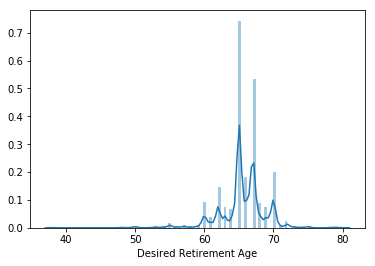

In [404]:
#Visualization 8.1: Distribution of desired retirement ages
sns.distplot(a=df.retirement_age, axlabel='Desired Retirement Age', bins=100)

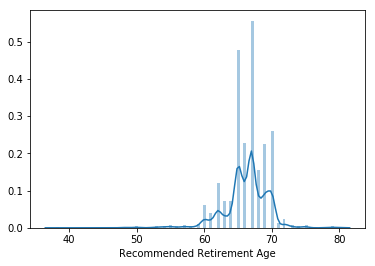

In [403]:
#Visualization 8.2: Distribution of recommended retirement ages
sns.distplot(df.recommended_retirement_age, axlabel='Recommended Retirement Age', bins=100)

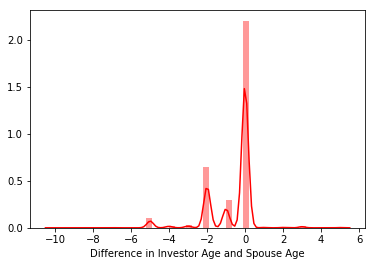

In [602]:
#Visualization 8.3: Distribution of difference in desired and recommended retirement ages
diff = df.retirement_age - df.recommended_retirement_age

#questionable 
great = diff[diff>0]
lower = diff[diff<0]

sns.distplot(diff, axlabel='Difference in Investor Age and Spouse Age', color='r')

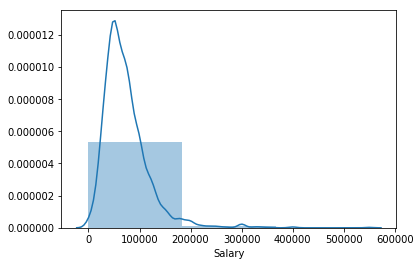

In [587]:
#Visualization 9: Distribution of Salary (Unconditional)
sns.distplot(df.salary, axlabel='Salary', bins=3)

## 33rd and 67th percentiles 

# can we bin by the number of users -- equal number of users per bin


# new visualization: desired retirement age conditional on salary

In [36]:
#Visualization 10: Distribution of Salary conditional on marital status
marriedSalary = df.salary[df.marital_status == True]
mmean = marriedSalary.mean()
mmedian = marriedSalary.median()
mstd = marriedSalary.std()


singleSalary = df.salary[df.marital_status == False]
smean = singleSalary.mean()
smedian = singleSalary.median()
sstd = singleSalary.std()

print tabulate([["Single", smean, smedian, sstd], 
                ["Married", mmean, mmedian, mstd]
               ],
              headers=['Marital Status', 'Mean', 'Median', 'Std.'])


# for married, add spouse salary
# add quartiles 
# average salary in the 33rd percentile
# average salary in 33rd and 67th
# average salary in 67th and above

Marital Status       Mean    Median     Std.
----------------  -------  --------  -------
Single            67705.3     60000  38974.4
Married           76775.9     66560  48743.4


[(20, 80)]

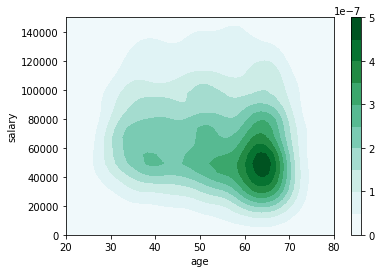

In [350]:
#Visualization 11: Distribution of Salary conditional on age
g = sns.kdeplot(df.age, df.salary, shade=True, cbar=True)
g.set(ylim=(0, 150000))
g.set(xlim=(20, 80))


# number of users per density 

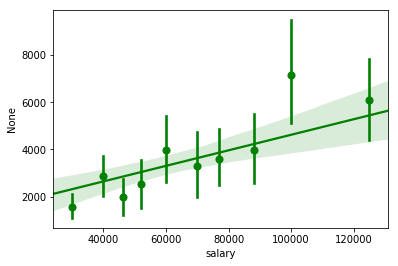

In [594]:
#Visualization 12: Distribution of combined pension and annuity as % of salary

guaranteedIncomeOverSalary = (df.pensions + df.annuities)/df.salary
gi = guaranteedIncomeOverSalary.to_frame()

#sns.distplot(df2)

sns.regplot(x=df.salary, y=(df.pensions + df.annuities), data=df, color="g",x_bins=10, ci=90)

## is the dot an average, median? veritical lines meaning? max/min/average

## let's filter out people don't have pensions and annuity 

# probability of having a pension or annuity per bin?

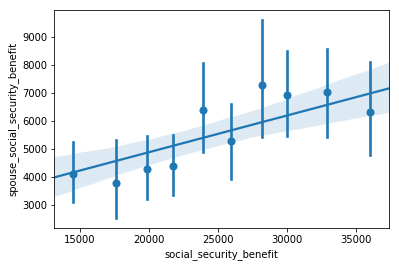

In [595]:
#Visualization 13: Distribution of ratio of spouse social security benefit to investor (only married investors)

SS = df.social_security_benefit.dropna()
spouseSS = df.spouse_social_security_benefit.dropna()

sns.regplot(x=df.social_security_benefit, y = df.spouse_social_security_benefit, data=df, x_bins=10)


# also accounting for single investors. this is incorrect. 

# calc ratio and plot histogram

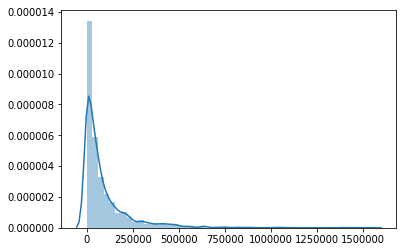

In [417]:
#Visualizations 14: Distribution of Sum of Advisable IRA Balance – unconditional

# Roth IRA
df.name_type_1.unique()
roth_ira_1 = df.balance_1[df.name_type_1 == "roth_ira"]
roth_ira_2 = df.balance_2[df.name_type_2 == "roth_ira"]
roth_ira_3 = df.balance_3[df.name_type_3 == "roth_ira"]
roth_ira_4 = df.balance_4[df.name_type_4 == "roth_ira"]
roth_ira_5 = df.balance_5[df.name_type_5 == "roth_ira"]
roth_ira_6 = df.balance_6[df.name_type_6 == "roth_ira"]
roth_ira_7 = df.balance_7[df.name_type_7 == "roth_ira"]
roth_ira_8 = df.balance_8[df.name_type_8 == "roth_ira"]
roth_ira_9 = df.balance_9[df.name_type_9 == "roth_ira"]
roth_ira_10 = df.balance_10[df.name_type_10 == "roth_ira"]
roth_ira_11 = df.balance_11[df.name_type_11 == "roth_ira"]
#traditional IRA
traditional_ira_1 = df.balance_1[df.name_type_1 == "traditional_ira"]
traditional_ira_2 = df.balance_2[df.name_type_2 == "traditional_ira"]
traditional_ira_3 = df.balance_3[df.name_type_3 == "traditional_ira"]
traditional_ira_4 = df.balance_4[df.name_type_4 == "traditional_ira"]
traditional_ira_5 = df.balance_5[df.name_type_5 == "traditional_ira"]
traditional_ira_6 = df.balance_6[df.name_type_6 == "traditional_ira"]
traditional_ira_7 = df.balance_7[df.name_type_7 == "traditional_ira"]
traditional_ira_8 = df.balance_8[df.name_type_8 == "traditional_ira"]
traditional_ira_9 = df.balance_9[df.name_type_9 == "traditional_ira"]
traditional_ira_10 = df.balance_10[df.name_type_10 == "traditional_ira"]
traditional_ira_11 = df.balance_11[df.name_type_11 == "traditional_ira"]

#Brokerage
brokerage_1 = df.balance_1[df.name_type_1 == "brokerage"]
brokerage_2 = df.balance_2[df.name_type_2 == "brokerage"]
brokerage_3 = df.balance_3[df.name_type_3 == "brokerage"]
brokerage_4 = df.balance_4[df.name_type_4 == "brokerage"]
brokerage_5 = df.balance_5[df.name_type_5 == "brokerage"]
brokerage_6 = df.balance_6[df.name_type_6 == "brokerage"]
brokerage_7 = df.balance_7[df.name_type_7 == "brokerage"]
brokerage_8 = df.balance_8[df.name_type_8 == "brokerage"]
brokerage_9 = df.balance_9[df.name_type_9 == "brokerage"]
brokerage_10 = df.balance_10[df.name_type_10 == "brokerage"]
brokerage_11 = df.balance_11[df.name_type_11 == "brokerage"]


IRA = [roth_ira_1, roth_ira_2, roth_ira_3, roth_ira_4, 
            roth_ira_5, roth_ira_6, roth_ira_7, roth_ira_8, 
            roth_ira_9, roth_ira_10, roth_ira_11,
      traditional_ira_1, traditional_ira_2, traditional_ira_3, 
      traditional_ira_4, traditional_ira_5, traditional_ira_6, 
      traditional_ira_7, traditional_ira_8, traditional_ira_9, 
      traditional_ira_10, traditional_ira_11]

Brokerage = [brokerage_1, brokerage_2, brokerage_3, brokerage_4, 
            brokerage_5, brokerage_6, brokerage_7, brokerage_8, 
            brokerage_9, brokerage_10, brokerage_11]

sns.distplot(pd.concat(IRA))


# account balance must be greater than $0 
# proportion of users with $0 vs non-zero balance
# ratio of sum of balances to salary 

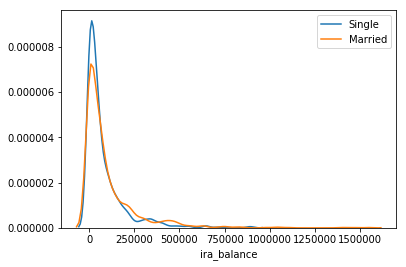

In [483]:
# Visualization 15: Distribution of Sum of Advisable IRA Balance – conditional on marital status

iradf = pd.concat(IRA)
iradf = iradf.to_frame()
iradf.columns = ['ira_balance']

iraMarital = iradf.merge(df[['marital_status']], left_index=True, right_index=True)
iraMarital

singleIRA = iraMarital.ira_balance[iraMarital.marital_status == False]
marriedIRA = iraMarital.ira_balance[iraMarital.marital_status == True]

singleIRA = singleIRA.to_frame()
sns.distplot(singleIRA, hist=False, axlabel='IRA Balance', label='Single') #kde_kws={'clip': (0, 100000000)})
sns.distplot(marriedIRA, hist=False, label='Married')

# normalize this to salary 
# if married, combined salary 
# account balance must be greater than $0 
# proportion of users with $0 vs non-zero balance


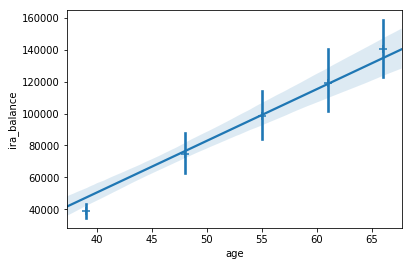

In [597]:
# Visualization 15: Distribution of Sum of Advisable IRA Balance – conditional on age
iraAge = iradf.merge(df[['age']], left_index=True, right_index=True)
sns.regplot(x="age", y="ira_balance", data=iraAge, marker="+", x_bins=5)

# how are the bins calculated? 
## is it based on the number of cases or max and min of ages and equal distribution?

# y axis to ira_balance/salary
# exclude ira balance $0

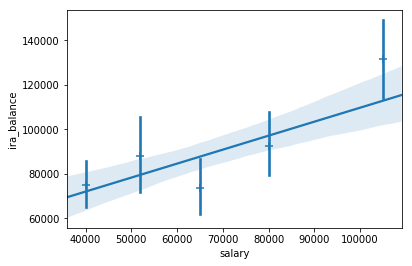

In [598]:
# Visualization 17: Distribution of Sum of Advisable IRA Balance – conditional on salary
iraSalary = iradf.merge(df[['salary']], left_index=True, right_index=True)
sns.regplot(x="salary", y="ira_balance", data=iraSalary, marker="+", x_bins=5)

# y axis to ira_balance/salary

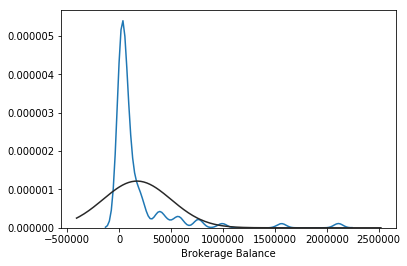

In [532]:
# Visualization 18: Distribution of Sum of Advisable Taxable Brokerage Account Balance – unconditional
data = pd.concat(Brokerage)
filtered = data[data!=0]
sns.distplot(filtered, axlabel='Brokerage Balance', hist=False, fit=norm)

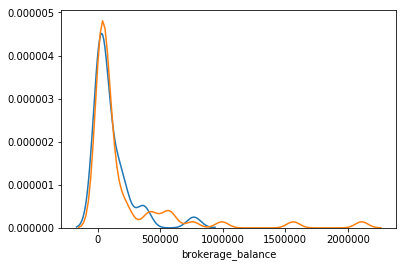

In [536]:
# Visualization 19: Distribution of Sum of Advisable Taxable Brokerage Balance – conditional on marital status

brokeragedf = pd.concat(Brokerage)
brokeragedf = brokeragedf.to_frame()
brokeragedf.columns = ['brokerage_balance']

brokerageMarital = brokeragedf.merge(df[['marital_status']], left_index=True, right_index=True)
brokerageMarital

singleBrokerage = brokerageMarital.brokerage_balance[brokerageMarital.marital_status == False]
marriedBrokerage = brokerageMarital.brokerage_balance[brokerageMarital.marital_status == True]

singleBrokerage = singleBrokerage[singleBrokerage!=0]
marriedBrokerage = marriedBrokerage[marriedBrokerage!=0]
sns.distplot(singleBrokerage, hist=False)
sns.distplot(marriedBrokerage, hist=False)

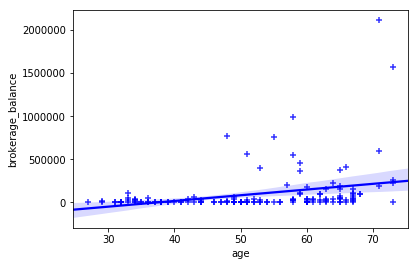

In [328]:
# Visualization 20: Distribution of Sum of Taxable Brokerage Balance – conditional on age
brokerageAge = brokeragedf.merge(df[['age']], left_index=True, right_index=True)
sns.regplot(x="age", y="brokerage_balance", data=brokerageAge, color="b", marker="+")

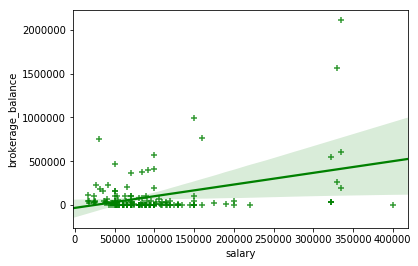

In [329]:
# Visualization 21: Distribution of Sum of Taxable Brokerage Balance – conditional on salary
brokerageSalary = brokeragedf.merge(df[['salary']], left_index=True, right_index=True)
sns.regplot(x="salary", y="brokerage_balance", data=brokerageSalary, color="g", marker="+")

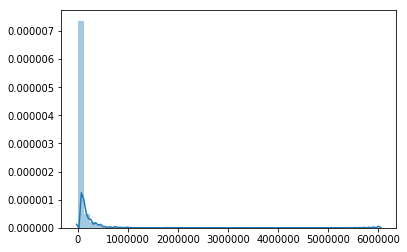

In [366]:
# Visualization 22: Distribution of Sum of Other Account Balance – unconditional

# 403b
account_1_403b = df.balance_1[df.name_type_1 == "403b"]
account_2_403b = df.balance_2[df.name_type_2 == "403b"]
account_3_403b = df.balance_3[df.name_type_3 == "403b"]
account_4_403b = df.balance_4[df.name_type_4 == "403b"]
account_5_403b = df.balance_5[df.name_type_5 == "403b"]
account_6_403b = df.balance_6[df.name_type_6 == "403b"]
account_7_403b = df.balance_7[df.name_type_7 == "403b"]
account_8_403b = df.balance_8[df.name_type_8 == "403b"]
account_9_403b = df.balance_9[df.name_type_9 == "403b"]
account_10_403b = df.balance_9[df.name_type_10 == "403b"]
account_11_403b = df.balance_9[df.name_type_11 == "403b"]

#account_403b = [account_1_403b, account_2_403b, account_3_403b, account_4_403b, 
#            account_5_403b, account_6_403b, account_7_403b, account_8_403b, 
#            account_9_403b, account_10_403b, account_11_403b]
#sns.distplot(pd.concat(account_403b))

# 401k
account_1_401k = df.balance_1[df.name_type_1 == "401k"]
account_2_401k = df.balance_2[df.name_type_2 == "401k"]
account_3_401k = df.balance_3[df.name_type_3 == "401k"]
account_4_401k = df.balance_4[df.name_type_4 == "401k"]
account_5_401k = df.balance_5[df.name_type_5 == "401k"]
account_6_401k = df.balance_6[df.name_type_6 == "401k"]
account_7_401k = df.balance_7[df.name_type_7 == "401k"]
account_8_401k = df.balance_8[df.name_type_8 == "401k"]
account_9_401k = df.balance_9[df.name_type_9 == "401k"]
account_10_401k = df.balance_9[df.name_type_10 == "401k"]
account_11_401k = df.balance_9[df.name_type_11 == "401k"]

#account_401k = [account_1_401k, account_2_401k, account_3_401k, account_4_401k, 
#            account_5_401k, account_6_401k, account_7_401k, account_8_401k, 
#            account_9_401k, account_10_401k, account_11_401k]

# non_qualified_defined_contribution
account_1_nqdc = df.balance_1[df.name_type_1 == "non_qualified_defined_contribution"]
account_2_nqdc = df.balance_2[df.name_type_2 == "non_qualified_defined_contribution"]
account_3_nqdc = df.balance_3[df.name_type_3 == "non_qualified_defined_contribution"]
account_4_nqdc = df.balance_4[df.name_type_4 == "non_qualified_defined_contribution"]
account_5_nqdc = df.balance_5[df.name_type_5 == "non_qualified_defined_contribution"]
account_6_nqdc = df.balance_6[df.name_type_6 == "non_qualified_defined_contribution"]
account_7_nqdc = df.balance_7[df.name_type_7 == "non_qualified_defined_contribution"]
account_8_nqdc = df.balance_8[df.name_type_8 == "non_qualified_defined_contribution"]
account_9_nqdc = df.balance_9[df.name_type_9 == "non_qualified_defined_contribution"]
account_10_nqdc = df.balance_9[df.name_type_10 == "non_qualified_defined_contribution"]
account_11_nqdc = df.balance_9[df.name_type_11 == "non_qualified_defined_contribution"]

#account_nqdc = [account_1_nqdc, account_2_nqdc, account_3_nqdc, account_4_nqdc, 
#            account_5_nqdc, account_6_nqdc, account_7_nqdc, account_8_nqdc, 
#            account_9_nqdc, account_10_nqdc, account_11_nqdc]

# profit_sharing
account_1_ps = df.balance_1[df.name_type_1 == "profit_sharing"]
account_2_ps = df.balance_2[df.name_type_2 == "profit_sharing"]
account_3_ps = df.balance_3[df.name_type_3 == "profit_sharing"]
account_4_ps = df.balance_4[df.name_type_4 == "profit_sharing"]
account_5_ps = df.balance_5[df.name_type_5 == "profit_sharing"]
account_6_ps = df.balance_6[df.name_type_6 == "profit_sharing"]
account_7_ps = df.balance_7[df.name_type_7 == "profit_sharing"]
account_8_ps = df.balance_8[df.name_type_8 == "profit_sharing"]
account_9_ps = df.balance_9[df.name_type_9 == "profit_sharing"]
account_10_ps = df.balance_9[df.name_type_10 == "profit_sharing"]
account_11_ps = df.balance_9[df.name_type_11 == "profit_sharing"]

#account_ps = [account_1_ps, account_2_ps, account_3_ps, account_4_ps, 
#            account_5_ps, account_6_ps, account_7_ps, account_8_ps, 
#            account_9_ps, account_10_ps, account_11_ps]

# 401a
account_1_401a = df.balance_1[df.name_type_1 == "401a_money_purchase"]
account_2_401a = df.balance_2[df.name_type_2 == "401a_money_purchase"]
account_3_401a = df.balance_3[df.name_type_3 == "401a_money_purchase"]
account_4_401a = df.balance_4[df.name_type_4 == "401a_money_purchase"]
account_5_401a = df.balance_5[df.name_type_5 == "401a_money_purchase"]
account_6_401a = df.balance_6[df.name_type_6 == "401a_money_purchase"]
account_7_401a = df.balance_7[df.name_type_7 == "401a_money_purchase"]
account_8_401a = df.balance_8[df.name_type_8 == "401a_money_purchase"]
account_9_401a = df.balance_9[df.name_type_9 == "401a_money_purchase"]
account_10_401a = df.balance_9[df.name_type_10 == "401a_money_purchase"]
account_11_401a = df.balance_9[df.name_type_11 == "401a_money_purchase"]

#account_401a = [account_1_401a, account_2_401a, account_3_401a, account_4_401a, 
#            account_5_401a, account_6_401a, account_7_401a, account_8_401a, 
#            account_9_401a, account_10_401a, account_11_401a]

# 457b
account_1_457b = df.balance_1[df.name_type_1 == "457b"]
account_2_457b = df.balance_2[df.name_type_2 == "457b"]
account_3_457b = df.balance_3[df.name_type_3 == "457b"]
account_4_457b = df.balance_4[df.name_type_4 == "457b"]
account_5_457b = df.balance_5[df.name_type_5 == "457b"]
account_6_457b = df.balance_6[df.name_type_6 == "457b"]
account_7_457b = df.balance_7[df.name_type_7 == "457b"]
account_8_457b = df.balance_8[df.name_type_8 == "457b"]
account_9_457b = df.balance_9[df.name_type_9 == "457b"]
account_10_457b = df.balance_9[df.name_type_10 == "457b"]
account_11_457b = df.balance_9[df.name_type_11 == "457b"]

#account_457b = [account_1_457b, account_2_457b, account_3_457b, account_4_457b, 
#            account_5_457b, account_6_457b, account_7_457b, account_8_457b, 
#            account_9_457b, account_10_457b, account_11_457b]

# 457b_government
account_1_457b_gov = df.balance_1[df.name_type_1 == "457b_government"]
account_2_457b_gov = df.balance_2[df.name_type_2 == "457b_government"]
account_3_457b_gov = df.balance_3[df.name_type_3 == "457b_government"]
account_4_457b_gov = df.balance_4[df.name_type_4 == "457b_government"]
account_5_457b_gov = df.balance_5[df.name_type_5 == "457b_government"]
account_6_457b_gov = df.balance_6[df.name_type_6 == "457b_government"]
account_7_457b_gov = df.balance_7[df.name_type_7 == "457b_government"]
account_8_457b_gov = df.balance_8[df.name_type_8 == "457b_government"]
account_9_457b_gov = df.balance_9[df.name_type_9 == "457b_government"]
account_10_457b_gov = df.balance_9[df.name_type_10 == "457b_government"]
account_11_457b_gov = df.balance_9[df.name_type_11 == "457b_government"]

#account_457b_gov = [account_1_457b_gov, account_2_457b_gov, 
#            account_3_457b_gov, account_4_457b_gov, 
#            account_5_457b_gov, account_6_457b_gov, 
#            account_7_457b_gov, account_8_457b_gov, 
#            account_9_457b_gov, account_10_457b_gov, 
#            account_11_457b_gov]


# 457b_non_profit
account_1_457b_np = df.balance_1[df.name_type_1 == "457b_non_profit"]
account_2_457b_np = df.balance_2[df.name_type_2 == "457b_non_profit"]
account_3_457b_np = df.balance_3[df.name_type_3 == "457b_non_profit"]
account_4_457b_np = df.balance_4[df.name_type_4 == "457b_non_profit"]
account_5_457b_np = df.balance_5[df.name_type_5 == "457b_non_profit"]
account_6_457b_np = df.balance_6[df.name_type_6 == "457b_non_profit"]
account_7_457b_np = df.balance_7[df.name_type_7 == "457b_non_profit"]
account_8_457b_np = df.balance_8[df.name_type_8 == "457b_non_profit"]
account_9_457b_np = df.balance_9[df.name_type_9 == "457b_non_profit"]
account_10_457b_np = df.balance_9[df.name_type_10 == "457b_non_profit"]
account_11_457b_np = df.balance_9[df.name_type_11 == "457b_non_profit"]

#account_457b_np = [account_1_457b_np, account_2_457b_np, 
#            account_3_457b_np, account_4_457b_np, 
#            account_5_457b_np, account_6_457b_np, 
#            account_7_457b_np, account_8_457b_np, 
#            account_9_457b_np, account_10_457b_np, 
#            account_11_457b_np]


# esop
account_1_esop = df.balance_1[df.name_type_1 == "esop"]
account_2_esop = df.balance_2[df.name_type_2 == "esop"]
account_3_esop = df.balance_3[df.name_type_3 == "esop"]
account_4_esop = df.balance_4[df.name_type_4 == "esop"]
account_5_esop = df.balance_5[df.name_type_5 == "esop"]
account_6_esop = df.balance_6[df.name_type_6 == "esop"]
account_7_esop = df.balance_7[df.name_type_7 == "esop"]
account_8_esop = df.balance_8[df.name_type_8 == "esop"]
account_9_esop = df.balance_9[df.name_type_9 == "esop"]
account_10_esop = df.balance_9[df.name_type_10 == "esop"]
account_11_esop = df.balance_9[df.name_type_11 == "esop"]

#account_esop = [account_1_esop, account_2_esop, account_3_esop, account_4_esop, 
#            account_5_esop, account_6_esop, account_7_esop, account_8_esop, 
#            account_9_esop, account_10_esop, account_11_esop]

# checking
account_1_checking = df.balance_1[df.name_type_1 == "checking"]
account_2_checking = df.balance_2[df.name_type_2 == "checking"]
account_3_checking = df.balance_3[df.name_type_3 == "checking"]
account_4_checking = df.balance_4[df.name_type_4 == "checking"]
account_5_checking = df.balance_5[df.name_type_5 == "checking"]
account_6_checking = df.balance_6[df.name_type_6 == "checking"]
account_7_checking = df.balance_7[df.name_type_7 == "checking"]
account_8_checking = df.balance_8[df.name_type_8 == "checking"]
account_9_checking = df.balance_9[df.name_type_9 == "checking"]
account_10_checking = df.balance_9[df.name_type_10 == "checking"]
account_11_checking = df.balance_9[df.name_type_11 == "checking"]

#account_checking = [account_1_checking, account_2_checking, account_3_checking, 
#            account_4_checking, account_5_checking, account_6_checking, 
#            account_7_checking, account_8_checking, 
#            account_9_checking, account_10_checking, 
#            account_11_checking]


# thrift_savings_plan
account_1_tsp = df.balance_1[df.name_type_1 == "thrift_savings_plan"]
account_2_tsp = df.balance_2[df.name_type_2 == "thrift_savings_plan"]
account_3_tsp = df.balance_3[df.name_type_3 == "thrift_savings_plan"]
account_4_tsp = df.balance_4[df.name_type_4 == "thrift_savings_plan"]
account_5_tsp = df.balance_5[df.name_type_5 == "thrift_savings_plan"]
account_6_tsp = df.balance_6[df.name_type_6 == "thrift_savings_plan"]
account_7_tsp = df.balance_7[df.name_type_7 == "thrift_savings_plan"]
account_8_tsp = df.balance_8[df.name_type_8 == "thrift_savings_plan"]
account_9_tsp = df.balance_9[df.name_type_9 == "thrift_savings_plan"]
account_10_tsp = df.balance_9[df.name_type_10 == "thrift_savings_plan"]
account_11_tsp = df.balance_9[df.name_type_11 == "thrift_savings_plan"]

#account_tsp = [account_1_tsp, account_2_tsp, account_3_tsp, account_4_tsp, 
#            account_5_tsp, account_6_tsp, account_7_tsp, account_8_tsp, 
#            account_9_tsp, account_10_tsp, account_11_tsp]


#other_accounts = [account_403b, account_401k, account_nqdc, account_ps,
#                 account_401a, account_457b, account_457b_gov, account_457b_np,
#                 account_esop, account_checking, account_tsp]


other_accounts = [
    #403b
    account_1_403b, account_2_403b, account_3_403b, account_4_403b, 
    account_5_403b, account_6_403b, account_7_403b, account_8_403b, 
    account_9_403b, account_10_403b, account_11_403b,
    
    #401k
    account_1_401k, account_2_401k, account_3_401k, account_4_401k, 
    account_5_401k, account_6_401k, account_7_401k, account_8_401k, 
    account_9_401k, account_10_401k, account_11_401k,
    
    #nqdc
    account_1_nqdc, account_2_nqdc, account_3_nqdc, account_4_nqdc, 
    account_5_nqdc, account_6_nqdc, account_7_nqdc, account_8_nqdc, 
    account_9_nqdc, account_10_nqdc, account_11_nqdc,
    
    #ps
    account_1_ps, account_2_ps, account_3_ps, account_4_ps, 
    account_5_ps, account_6_ps, account_7_ps, account_8_ps, 
    account_9_ps, account_10_ps, account_11_ps,
    
    #401a
    account_1_401a, account_2_401a, account_3_401a, account_4_401a, 
    account_5_401a, account_6_401a, account_7_401a, account_8_401a, 
    account_9_401a, account_10_401a, account_11_401a,
    
    #457b
    account_1_457b, account_2_457b, account_3_457b, account_4_457b, 
    account_5_457b, account_6_457b, account_7_457b, account_8_457b, 
    account_9_457b, account_10_457b, account_11_457b,
    
    #457b_gov
    account_1_457b_gov, account_2_457b_gov, 
    account_3_457b_gov, account_4_457b_gov, 
    account_5_457b_gov, account_6_457b_gov, 
    account_7_457b_gov, account_8_457b_gov, 
    account_9_457b_gov, account_10_457b_gov, 
    account_11_457b_gov,
    
    #457b_np
    account_1_457b_np, account_2_457b_np, 
    account_3_457b_np, account_4_457b_np, 
    account_5_457b_np, account_6_457b_np, 
    account_7_457b_np, account_8_457b_np, 
    account_9_457b_np, account_10_457b_np, 
    account_11_457b_np,
    
    #esop
    account_1_esop, account_2_esop, account_3_esop, account_4_esop, 
    account_5_esop, account_6_esop, account_7_esop, account_8_esop, 
    account_9_esop, account_10_esop, account_11_esop,
    
    #checking
    account_1_checking, account_2_checking, account_3_checking, 
    account_4_checking, account_5_checking, account_6_checking, 
    account_7_checking, account_8_checking, 
    account_9_checking, account_10_checking, 
    account_11_checking,
    
    #tsp
    account_1_tsp, account_2_tsp, account_3_tsp, account_4_tsp, 
    account_5_tsp, account_6_tsp, account_7_tsp, account_8_tsp, 
    account_9_tsp, account_10_tsp, account_11_tsp

]

sns.distplot(pd.concat(other_accounts))


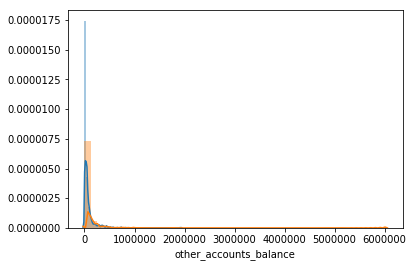

In [369]:
# Visualization 23: Distribution of Sum of Other Account Balance – conditional on marital status

otheraccountsdf = pd.concat(other_accounts)
otheraccountsdf = otheraccountsdf.to_frame()
otheraccountsdf.columns = ['other_accounts_balance']

otherAccountsMarital = otheraccountsdf.merge(df[['marital_status']], left_index=True, right_index=True)
otherAccountsMarital

singleOtherAccounts = otherAccountsMarital.other_accounts_balance[otherAccountsMarital.marital_status == False]
marriedOtherAccounts = otherAccountsMarital.other_accounts_balance[otherAccountsMarital.marital_status == True]

#blue
sns.distplot(singleOtherAccounts)
#yellow
sns.distplot(marriedOtherAccounts)

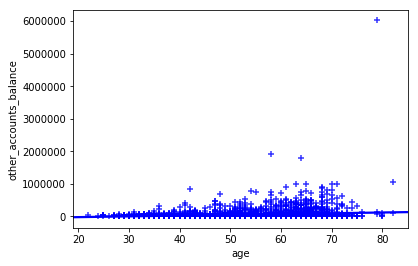

In [371]:
# Visualization 24: Distribution of Sum of Other Account Balance – conditional on age
otherAccountsAge = otheraccountsdf.merge(df[['age']], left_index=True, right_index=True)
sns.regplot(x="age", y="other_accounts_balance", data=otherAccountsAge, color="b", marker="+")

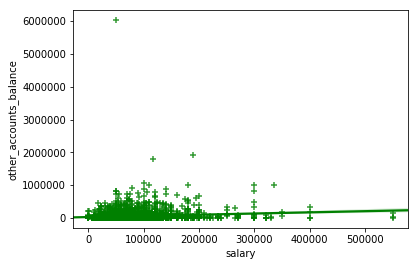

In [372]:
# Visualization 25: Distribution of Sum of Other Account Balance – conditional on salary
otherAccountsSalary = otheraccountsdf.merge(df[['salary']], left_index=True, right_index=True)
sns.regplot(x="salary", y="other_accounts_balance", data=otherAccountsSalary, color="g", marker="+")